# Punto 1

$$F_{(S)}=\frac{1}{S^3 + S^2 +2S +1} =Y_{21(S)}$$
Necesito que el numerador sea Impar, por lo tanto dado que el numerador esta compuesto por "1"(funcion par) dividimos por la parte impar del denominador.<br>
Resultando en:
$$F_{(S)}=\frac{Y_{21}}{Y_{22}+1}=\frac{\frac{1}{S^3+2S}}{\frac{S^2+1}{S^3+2S}+1}$$
## El 1.1 no se me ocurre como meterlo aca sin subir dibujitos asique si me pinta despue subo los dibujitos!(Si, me hacen bullying por dibujar con los pies)

In [2]:
from scipy import signal
from sympy import *
import matplotlib.pyplot as plt
import math as m
from splane import pzmap, grpDelay, bodePlot
import numpy as np

S=symbols('S')

print("Veamos como queda el Y22 sin olvidar que los polos de Y21 son compartidos con Y22")
Y22=(S**2+1)/(S**3+2*S)
Z=1/Y22
pprint(apart(Z))
print("Aqui podemos ver claramente un inductor en serie y algo mas...\nQue para facilitar lo que viene despues buscaremos darle forma de red T.")
Z2=Z-S
Y2=1/Z2
pprint(apart(Y2))
print("Aca a simple vista se ve el capacitor en derivacion =1 y el inductor serie =1")

Veamos como queda el Y22 sin olvidar que los polos de Y21 son compartidos con Y22
      S   
S + ──────
     2    
    S  + 1
Aqui podemos ver claramente un inductor en serie y algo mas...
Que para facilitar lo que viene despues buscaremos darle forma de red T.
    1
S + ─
    S
Aca a simple vista se ve el capacitor en derivacion =1 y el inductor serie =1


# Verifico con un simulador porque soy un comodo =)

<img src="./1.2 verificacion.PNG" align="center" width="80%" />

Esta red responde a: $$Z_{ot}=\sqrt{(Z_1 Z_2)} \sqrt{(1+ \frac{Z_1}{4Z_2})}$$
Siendo que es un pasa bajos entonces $Z_1=JWL$ y $Z_2=\frac{1}{JWC}$<br>
Resultando en:$$Z_{ot}=\sqrt{\frac{L}{C}}\sqrt{1- \frac{W^2 LC}{4}}$$

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


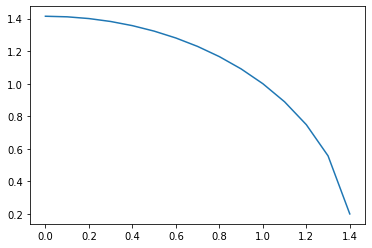

Esta es la Zot ahora procedemos a adaptarla y luego graficar todo junto.



In [6]:
#Se reemplazo L=2 C=1
x1=np.arange(0,4,0.1)
y1=np.sqrt(2-(x1**2 * 2**2)/4)
plt.plot(x1,y1)
plt.show()
print("Esta es la Zot ahora procedemos a adaptarla y luego graficar todo junto.\n")

<img src="./Plantilla m derivado.PNG" align="center" width="80%" />

In [7]:
print("Sabemos que el valor de m que mejor adapta la red es 0.6 entonces hacemos los calculos para ese valor.\n")
Lk=2
Ck=1
m=0.6
La=m*Lk
Lb=Lk*(1-m**2)/(4*m)
Cb=m*Ck
print("El La vale:",La,"\n")
print("El Lb vale:",Lb,"\n")
print("El Cb vale:",Cb,"\n")

Sabemos que el valor de m que mejor adapta la red es 0.6 entonces hacemos los calculos para ese valor.

El La vale: 1.2 

El Lb vale: 0.5333333333333333 

El Cb vale: 0.6 



<img src="./Zw.PNG" align="center" width="80%" />

# No se nos aclara para el 1.4 una frecuencia asumimos que seguimos con W=1

In [10]:
##########Constantes de Desnormalizacion#############
N_z=50
#N_w=1*10**9*2*m.pi
N_w=1
####Vector de resistencias Normalizadas#############
#####Se debe inicializar con los valores de tus resistencias########
R_n=[1]

####Vector de resistencias Desnormalizadas##########
R=[]
for i in range(len(R_n)):
    
    R.append(R_n[i]*N_z)
    print('R[',i+1,'] valia',R_n[i],'=>',R[i])

####Vector de capacitores Normalizados#############
#####Se debe inicializar con los valores de tus capacitores########
C_n=[0.3,1]

####Vector de Capacitores Desnormalizados##########

C=[]
for i in range(len(C_n)):
    C.append(C_n[i]/N_z / N_w)
    print('C[',i+1,'] valia',C_n[i],'=>',C[i])

####Vector de inductores Normalizados#############
#####Se debe inicializar con los valores de tus inductores########
L_n=[1.06,1.6]

####Vector de inductores Desnormalizados##########

L=[]
for i in range(len(L_n)):
    L.append(L_n[i]*N_z/N_w)
    print('L[',i+1,'] valia',L_n[i],'=>',L[i])


R[ 1 ] valia 1 => 50
C[ 1 ] valia 0.3 => 0.006
C[ 2 ] valia 1 => 0.02
L[ 1 ] valia 1.06 => 53.0
L[ 2 ] valia 1.6 => 80.0


# Punto 1.5
Planteamos $$S_{11}=\frac{Z_1 -R_{01}}{Z_1 +R_{01}}$$
<br>
$$S_{22}=\frac{Z_2 -R_{02}}{Z_1 +R_{02}}$$
<br>
$$S_{21}=\frac{V2}{Vg1/2}\sqrt{\frac{R_2}{R1}}$$
Algunas consideraciones que podemos hacer por como es la red en si misma son las siguientes:
$$Z_1=Z_2$$
Esto por ser simetrica.<br>
$$S_{21}=S_{12}$$
Esto por ser reciproca.<br>
$$S_{11}=S_{22}$$
Esto por ser simetrica.<br>
Ahora procedemos a calcular Z1

In [18]:
#R,L,C son datos conocidos
L=1
C=1
R=1
Paralelo_Z=(S*L + R) +1/S*C
Z1=Paralelo_Z +S*L
print("Z1 queda entonces:")
pprint((Z1))
print("De aqui que S11=")
S11=(Z1-R)/(Z1+R)
pprint(simplify(S11))
#S21 es una transferencia de tensiones que ya conocemos...
S21=1/(S**3+S**2+2*S+1)
print("S21 es:")
pprint(S21)

Z1 queda entonces:
          1
2⋅S + 1 + ─
          S
De aqui que S11=
       2       
    2⋅S  + 1   
───────────────
2⋅S⋅(S + 1) + 1
S21 es:
        1        
─────────────────
 3    2          
S  + S  + 2⋅S + 1


# Punto2
Planteo la suma de dos cuadripolos Y cascadeados con uno T
$$Y_{equivalente}=Y_{FET}+Y_C$$
El $Y_{equivalente}$ lo pasamos a un $T_{equivalente}$
Con la siguiente identidad:
$$\begin{bmatrix}
Y_{11} & Y_{12}\\
Y_{21} & Y_{22}
\end{bmatrix}=\begin{bmatrix}
\frac{-Y_{22}}{Y_{21}} & \frac{-1}{Y_{21}}\\
\frac{-\Delta Y}{Y_{21}} & \frac{-Y_{11}}{Y_{21}}
\end{bmatrix}$$
El cuadripolo Y del capacitor se halla facil si lo asimilamos a la red pi en la que el componente del medio vale $-Y_{12}$.<br>
Por las dudas explicito las ecuaciones y despues agrego un dibujito...
$$SC=-Y_{12}$$
$$0=Y_{22}+Y_{12}$$
$$0=Y_{11}+Y_{12}$$
<br>
Por otro lado tambien recordemos que la matriz T del cuadripolo que es un capa solito en serie es algo como:
$$\begin{bmatrix}
1 & Z\\
0 & 1
\end{bmatrix}$$
De todas formas los comprobamos abajo.

In [28]:
gm, capa=symbols('gm capa')
#Si ya use la letra C soy un bolas
Y_FET= Matrix(([0,0],
            [gm,0]))
print("Y_FET=")
pprint(Y_FET)

Y_C= Matrix(([S*capa,-S*capa],
            [-S*capa,S*capa]))
print("Y_C=")
pprint(Y_C)

Y_Equi= Y_FET + Y_C
print("Y_Equi=")
pprint(Y_Equi)

#print("\nY_Equi[1] es:",Y_Equi[1])

T_Equi= Matrix(([-Y_Equi[3]/Y_Equi[2],-1/Y_Equi[2]],
            [-det(Y_Equi)/Y_Equi[2],-Y_Equi[0]/Y_Equi[2]]))
print("T_Equi=")
pprint(T_Equi)

T_C=Matrix(([-Y_C[3]/Y_C[2],-1/Y_C[2]],
            [-det(Y_C)/Y_C[2],-Y_C[0]/Y_C[2]]))
print("T_C=")
pprint(T_C)

T_total=T_C*T_Equi
print("T_total=")
pprint(T_total)

Y_FET=
⎡0   0⎤
⎢     ⎥
⎣gm  0⎦
Y_C=
⎡S⋅capa   -S⋅capa⎤
⎢                ⎥
⎣-S⋅capa  S⋅capa ⎦
Y_Equi=
⎡   S⋅capa     -S⋅capa⎤
⎢                     ⎥
⎣-S⋅capa + gm  S⋅capa ⎦
T_Equi=
⎡             -S⋅capa                    -1      ⎤
⎢           ────────────             ────────────⎥
⎢           -S⋅capa + gm             -S⋅capa + gm⎥
⎢                                                ⎥
⎢   2     2                                      ⎥
⎢- S ⋅capa  - S⋅capa⋅(-S⋅capa + gm)    -S⋅capa   ⎥
⎢──────────────────────────────────  ────────────⎥
⎣           -S⋅capa + gm             -S⋅capa + gm⎦
T_C=
⎡     1   ⎤
⎢1  ──────⎥
⎢   S⋅capa⎥
⎢         ⎥
⎣0    1   ⎦
T_total=
⎡                    2     2                                      ⎤
⎢     S⋅capa      - S ⋅capa  - S⋅capa⋅(-S⋅capa + gm)      -2      ⎥
⎢- ──────────── + ──────────────────────────────────  ────────────⎥
⎢  -S⋅capa + gm         S⋅capa⋅(-S⋅capa + gm)         -S⋅capa + gm⎥
⎢                                                                

Una vez que tenemos la T total recordemos que unicamente nos interesa la inversa de A ya que A por definicion es:$A=\frac{V1}{V2}$ con la condicion de $I2=0$ es decir circuito abierto.<br>